# Stock Price Movement Prediction Using The Deutsche Börse Public Dataset & Machine Learning - Notebook 2 (Create Test Dataset)

Here we create a test set of multiple days' data, using the method established in Notebook 1.


## 1. Obtaining Data

We obtain the data for multiple days from the AWS PDS S3 bucket, as per notebook 1, and output a single dataset.


### 'Cooked' dataset 

- Contains the top 100 stocks by trade volume for the days from 2018-01-01 to 2018-03-23 excluding days with no
trades. 
- We have filled in missing trades to have volume 0 and missing prices by forward filling.
- We have added an extra column called `HasTrade` to indicate if the values were filled-in.
- The data is saved in picked format (pkl) and in csv format. The csv format does not preserve the index.
- The picked format preserves the multi-index (by Mnemonic and CalcDataTime). The index values are sorted by Mnemonic and then by CalcDateTime

```
/data/processed/cooked_v3.csv
/data/processed/cooked_v3.pkl
```

We prefer using `/data/processed/cooked_v3.pkl` since it preserves the indices.

In [1]:
import pandas as pd
import os.path

enable_assert = False 

# Edit the start/end date and the output folders
from_date = '2017-07-01'
until_date = '2018-05-15'

# if you enable assert set from_date and until date as below
if enable_assert:
    assert from_date >= '2018-01-01'
    assert until_date <= '2018-03-23'

local_data_folder = '/data/deutsche-boerse-xetra-pds' # do not end in /
output_folder = '/data/processed' # do not end in /

download_script = '/data/deutsche-boerse-xetra-pds/download.sh'

dates = list(pd.date_range(from_date, until_date, freq='D').strftime('%Y-%m-%d'))

! mkdir -p {local_data_folder}

# We found it was more reliable to generate a bash script and run it, rather than
# run the commands in a python for-loop

with open(download_script, 'w') as f:
    f.write("#!/bin/bash\n")
    f.write("\nset -euo pipefail\n")
    f.write("\n# This script was generated to download data for multiple days\n")
    for date in dates:
        success_file =  os.path.join(local_data_folder, date, 'success')

        f.write("""
if [ ! -f {success_file} ]; then

    echo "Getting PDS dataset for date {date}"        
    mkdir -p {local_data_folder}/{date}
    aws s3 sync s3://deutsche-boerse-xetra-pds/{date} {local_data_folder}/{date} --no-sign-request
    touch {success_file}            
else
    echo "PDS dataset for date {date} already exists"
fi\n""".format(success_file=success_file, date=date, local_data_folder=local_data_folder))

        
! chmod +x {download_script}     
! head -n 15 {download_script} 

#!/bin/bash

set -euo pipefail

# This script was generated to download data for multiple days

if [ ! -f /data/deutsche-boerse-xetra-pds/2017-06-01/success ]; then

    echo "Getting PDS dataset for date 2017-06-01"        
    mkdir -p /data/deutsche-boerse-xetra-pds/2017-06-01
    aws s3 sync s3://deutsche-boerse-xetra-pds/2017-06-01 /data/deutsche-boerse-xetra-pds/2017-06-01 --no-sign-request
    touch /data/deutsche-boerse-xetra-pds/2017-06-01/success            
else
    echo "PDS dataset for date 2017-06-01 already exists"
fi


In [2]:
!  {download_script}

Getting PDS dataset for date 2017-06-01
Getting PDS dataset for date 2017-06-02
Getting PDS dataset for date 2017-06-03
Getting PDS dataset for date 2017-06-04
Getting PDS dataset for date 2017-06-05
Getting PDS dataset for date 2017-06-06
Getting PDS dataset for date 2017-06-07
Getting PDS dataset for date 2017-06-08
Getting PDS dataset for date 2017-06-09
Getting PDS dataset for date 2017-06-10
Getting PDS dataset for date 2017-06-11
Getting PDS dataset for date 2017-06-12
Getting PDS dataset for date 2017-06-13
Getting PDS dataset for date 2017-06-14
Getting PDS dataset for date 2017-06-15
Getting PDS dataset for date 2017-06-16
Getting PDS dataset for date 2017-06-17
Getting PDS dataset for date 2017-06-18
Getting PDS dataset for date 2017-06-19
Getting PDS dataset for date 2017-06-20
download: s3://deutsche-boerse-xetra-pds/2017-06-20/2017-06-20_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-20/2017-06-20_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/20

download: s3://deutsche-boerse-xetra-pds/2017-06-21/2017-06-21_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-21/2017-06-21_BINS_XETR21.csv
Getting PDS dataset for date 2017-06-22
download: s3://deutsche-boerse-xetra-pds/2017-06-22/2017-06-22_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-22/2017-06-22_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-22/2017-06-22_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-22/2017-06-22_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-22/2017-06-22_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-22/2017-06-22_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-22/2017-06-22_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-22/2017-06-22_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-22/2017-06-22_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-22/2017-06-22_BINS_XETR07.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-06-24/2017-06-24_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-24/2017-06-24_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-24/2017-06-24_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-24/2017-06-24_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-24/2017-06-24_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-24/2017-06-24_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-24/2017-06-24_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-24/2017-06-24_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-24/2017-06-24_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-24/2017-06-24_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-24/2017-06-24_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-24/2017-06-24_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-24/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-06-26/2017-06-26_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-26/2017-06-26_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-26/2017-06-26_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-26/2017-06-26_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-26/2017-06-26_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-26/2017-06-26_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-26/2017-06-26_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-26/2017-06-26_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-26/2017-06-26_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-26/2017-06-26_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-26/2017-06-26_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-26/2017-06-26_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-26/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-06-28/2017-06-28_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-28/2017-06-28_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-28/2017-06-28_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-28/2017-06-28_BINS_XETR23.csv
Getting PDS dataset for date 2017-06-29
download: s3://deutsche-boerse-xetra-pds/2017-06-29/2017-06-29_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-29/2017-06-29_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-29/2017-06-29_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-29/2017-06-29_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-29/2017-06-29_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-29/2017-06-29_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-06-29/2017-06-29_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-06-29/2017-06-29_BINS_XETR07.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-01/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-03/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-07-05/2017-07-05_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-05/2017-07-05_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-05/2017-07-05_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-05/2017-07-05_BINS_XETR13.csv
Getting PDS dataset for date 2017-07-06
download: s3://deutsche-boerse-xetra-pds/2017-07-06/2017-07-06_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-06/2017-07-06_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-06/2017-07-06_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-06/2017-07-06_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-06/2017-07-06_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-06/2017-07-06_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-06/2017-07-06_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-06/2017-07-06_BINS_XETR02.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-07-08/2017-07-08_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-08/2017-07-08_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-08/2017-07-08_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-08/2017-07-08_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-08/2017-07-08_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-08/2017-07-08_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-08/2017-07-08_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-08/2017-07-08_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-08/2017-07-08_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-08/2017-07-08_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-08/2017-07-08_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-08/2017-07-08_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-08/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-10/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-12/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-14/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-07-16/2017-07-16_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-16/2017-07-16_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-16/2017-07-16_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-16/2017-07-16_BINS_XETR10.csv
Getting PDS dataset for date 2017-07-17
download: s3://deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR01.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-19/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-21/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-07-23/2017-07-23_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-23/2017-07-23_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-23/2017-07-23_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-23/2017-07-23_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-23/2017-07-23_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-23/2017-07-23_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-23/2017-07-23_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-23/2017-07-23_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-23/2017-07-23_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-23/2017-07-23_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-23/2017-07-23_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-23/2017-07-23_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-23/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-07-25/2017-07-25_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-25/2017-07-25_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-25/2017-07-25_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-25/2017-07-25_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-25/2017-07-25_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-25/2017-07-25_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-25/2017-07-25_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-25/2017-07-25_BINS_XETR13.csv
Getting PDS dataset for date 2017-07-26
download: s3://deutsche-boerse-xetra-pds/2017-07-26/2017-07-26_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-26/2017-07-26_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-26/2017-07-26_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-26/2017-07-26_BINS_XETR02.csv
download: s3://deu

Getting PDS dataset for date 2017-07-28
download: s3://deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR05.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-07-30/2017-07-30_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-30/2017-07-30_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-30/2017-07-30_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-30/2017-07-30_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-30/2017-07-30_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-30/2017-07-30_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-30/2017-07-30_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-30/2017-07-30_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-30/2017-07-30_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-30/2017-07-30_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-30/2017-07-30_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-30/2017-07-30_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-30/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-01/2017-08-01_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-01/2017-08-01_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-01/2017-08-01_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-01/2017-08-01_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-01/2017-08-01_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-01/2017-08-01_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-01/2017-08-01_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-01/2017-08-01_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-01/2017-08-01_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-01/2017-08-01_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-01/2017-08-01_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-01/2017-08-01_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-01/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-03/2017-08-03_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-03/2017-08-03_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-03/2017-08-03_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-03/2017-08-03_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-03/2017-08-03_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-03/2017-08-03_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-03/2017-08-03_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-03/2017-08-03_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-03/2017-08-03_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-03/2017-08-03_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-03/2017-08-03_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-03/2017-08-03_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-03/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-05/2017-08-05_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-05/2017-08-05_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-05/2017-08-05_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-05/2017-08-05_BINS_XETR09.csv
Getting PDS dataset for date 2017-08-06
download: s3://deutsche-boerse-xetra-pds/2017-08-06/2017-08-06_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-06/2017-08-06_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-06/2017-08-06_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-06/2017-08-06_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-06/2017-08-06_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-06/2017-08-06_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-06/2017-08-06_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-06/2017-08-06_BINS_XETR02.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-08-08/2017-08-08_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-08/2017-08-08_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-08/2017-08-08_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-08/2017-08-08_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-08/2017-08-08_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-08/2017-08-08_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-08/2017-08-08_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-08/2017-08-08_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-08/2017-08-08_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-08/2017-08-08_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-08/2017-08-08_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-08/2017-08-08_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-08/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-10/2017-08-10_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-10/2017-08-10_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-10/2017-08-10_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-10/2017-08-10_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-10/2017-08-10_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-10/2017-08-10_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-10/2017-08-10_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-10/2017-08-10_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-10/2017-08-10_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-10/2017-08-10_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-10/2017-08-10_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-10/2017-08-10_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-10/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-12/2017-08-12_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-12/2017-08-12_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-12/2017-08-12_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-12/2017-08-12_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-12/2017-08-12_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-12/2017-08-12_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-12/2017-08-12_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-12/2017-08-12_BINS_XETR18.csv
Getting PDS dataset for date 2017-08-13
download: s3://deutsche-boerse-xetra-pds/2017-08-13/2017-08-13_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-13/2017-08-13_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-13/2017-08-13_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-13/2017-08-13_BINS_XETR03.csv
download: s3://deu

Getting PDS dataset for date 2017-08-15
download: s3://deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR04.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-17/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-19/2017-08-19_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-19/2017-08-19_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-19/2017-08-19_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-19/2017-08-19_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-19/2017-08-19_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-19/2017-08-19_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-19/2017-08-19_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-19/2017-08-19_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-19/2017-08-19_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-19/2017-08-19_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-19/2017-08-19_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-19/2017-08-19_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-19/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-21/2017-08-21_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-21/2017-08-21_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-21/2017-08-21_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-21/2017-08-21_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-21/2017-08-21_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-21/2017-08-21_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-21/2017-08-21_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-21/2017-08-21_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-21/2017-08-21_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-21/2017-08-21_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-21/2017-08-21_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-21/2017-08-21_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-21/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-23/2017-08-23_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-23/2017-08-23_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-23/2017-08-23_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-23/2017-08-23_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-23/2017-08-23_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-23/2017-08-23_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-23/2017-08-23_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-23/2017-08-23_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-23/2017-08-23_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-23/2017-08-23_BINS_XETR14.csv
Getting PDS dataset for date 2017-08-24
download: s3://deutsche-boerse-xetra-pds/2017-08-24/2017-08-24_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-24/2017-08-24_BINS_XETR00.csv
download: s3://deu

Getting PDS dataset for date 2017-08-26
download: s3://deutsche-boerse-xetra-pds/2017-08-26/2017-08-26_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-26/2017-08-26_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-26/2017-08-26_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-26/2017-08-26_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-26/2017-08-26_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-26/2017-08-26_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-26/2017-08-26_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-26/2017-08-26_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-26/2017-08-26_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-26/2017-08-26_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-26/2017-08-26_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-26/2017-08-26_BINS_XETR07.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-08-28/2017-08-28_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-28/2017-08-28_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-28/2017-08-28_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-28/2017-08-28_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-28/2017-08-28_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-28/2017-08-28_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-28/2017-08-28_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-28/2017-08-28_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-28/2017-08-28_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-28/2017-08-28_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-28/2017-08-28_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-28/2017-08-28_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-28/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-30/2017-08-30_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-30/2017-08-30_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-30/2017-08-30_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-30/2017-08-30_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-30/2017-08-30_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-30/2017-08-30_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-30/2017-08-30_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-30/2017-08-30_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-30/2017-08-30_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-30/2017-08-30_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-30/2017-08-30_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-30/2017-08-30_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-30/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-09-01/2017-09-01_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-01/2017-09-01_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-01/2017-09-01_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-01/2017-09-01_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-01/2017-09-01_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-01/2017-09-01_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-01/2017-09-01_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-01/2017-09-01_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-01/2017-09-01_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-01/2017-09-01_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-01/2017-09-01_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-01/2017-09-01_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-01/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-09-03/2017-09-03_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-03/2017-09-03_BINS_XETR17.csv
Getting PDS dataset for date 2017-09-04
download: s3://deutsche-boerse-xetra-pds/2017-09-04/2017-09-04_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-04/2017-09-04_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-04/2017-09-04_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-04/2017-09-04_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-04/2017-09-04_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-04/2017-09-04_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-04/2017-09-04_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-04/2017-09-04_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-04/2017-09-04_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-04/2017-09-04_BINS_XETR04.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-09-06/2017-09-06_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-06/2017-09-06_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-06/2017-09-06_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-06/2017-09-06_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-06/2017-09-06_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-06/2017-09-06_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-06/2017-09-06_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-06/2017-09-06_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-06/2017-09-06_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-06/2017-09-06_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-06/2017-09-06_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-06/2017-09-06_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-06/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-09-08/2017-09-08_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-08/2017-09-08_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-08/2017-09-08_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-08/2017-09-08_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-08/2017-09-08_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-08/2017-09-08_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-08/2017-09-08_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-08/2017-09-08_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-08/2017-09-08_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-08/2017-09-08_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-08/2017-09-08_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-08/2017-09-08_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-08/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR22.csv
Getting PDS dataset for date 2017-09-11
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-09-12/2017-09-12_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-12/2017-09-12_BINS_XETR14.csv
Getting PDS dataset for date 2017-09-13
download: s3://deutsche-boerse-xetra-pds/2017-09-13/2017-09-13_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-13/2017-09-13_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-13/2017-09-13_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-13/2017-09-13_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-13/2017-09-13_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-13/2017-09-13_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-13/2017-09-13_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-13/2017-09-13_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-13/2017-09-13_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-13/2017-09-13_BINS_XETR01.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-09-15/2017-09-15_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-15/2017-09-15_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-15/2017-09-15_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-15/2017-09-15_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-15/2017-09-15_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-15/2017-09-15_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-15/2017-09-15_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-15/2017-09-15_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-15/2017-09-15_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-15/2017-09-15_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-15/2017-09-15_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-15/2017-09-15_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-15/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-09-17/2017-09-17_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-17/2017-09-17_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-17/2017-09-17_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-17/2017-09-17_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-17/2017-09-17_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-17/2017-09-17_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-17/2017-09-17_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-17/2017-09-17_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-17/2017-09-17_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-17/2017-09-17_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-17/2017-09-17_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-17/2017-09-17_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-17/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-19/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR09.csv
Getting PDS dataset for date 2017-09-22
download: s3://deutsche-boerse-xetra-pds/2017-09-22/2017-09-22_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-22/2017-09-22_BINS_XETR01.csv
download: s3://deu

Getting PDS dataset for date 2017-09-24
download: s3://deutsche-boerse-xetra-pds/2017-09-24/2017-09-24_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-24/2017-09-24_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-24/2017-09-24_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-24/2017-09-24_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-24/2017-09-24_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-24/2017-09-24_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-24/2017-09-24_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-24/2017-09-24_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-24/2017-09-24_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-24/2017-09-24_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-24/2017-09-24_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-24/2017-09-24_BINS_XETR08.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-26/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-28/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-30/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR23.csv
Getting PDS dataset for date 2017-10-03
download: s3://deutsche-boerse-xetra-pds/2017-10-03/2017-10-03_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-03/2017-10-03_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-03/2017-10-03_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-03/2017-10-03_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-03/2017-10-03_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-03/2017-10-03_BINS_XETR00.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-10-05/2017-10-05_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-05/2017-10-05_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-05/2017-10-05_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-05/2017-10-05_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-05/2017-10-05_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-05/2017-10-05_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-05/2017-10-05_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-05/2017-10-05_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-05/2017-10-05_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-05/2017-10-05_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-05/2017-10-05_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-05/2017-10-05_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-05/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-07/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-09/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR14.csv
Getting PDS dataset for date 2017-10-12
download: s3://deutsche-boerse-xetra-pds/2017-10-12/2017-10-12_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-12/2017-10-12_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-12/2017-10-12_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-12/2017-10-12_BINS_XETR01.csv
download: s3://deu

Getting PDS dataset for date 2017-10-14
download: s3://deutsche-boerse-xetra-pds/2017-10-14/2017-10-14_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-14/2017-10-14_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-14/2017-10-14_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-14/2017-10-14_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-14/2017-10-14_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-14/2017-10-14_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-14/2017-10-14_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-14/2017-10-14_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-14/2017-10-14_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-14/2017-10-14_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-14/2017-10-14_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-14/2017-10-14_BINS_XETR02.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-10-16/2017-10-16_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-16/2017-10-16_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-16/2017-10-16_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-16/2017-10-16_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-16/2017-10-16_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-16/2017-10-16_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-16/2017-10-16_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-16/2017-10-16_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-16/2017-10-16_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-16/2017-10-16_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-16/2017-10-16_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-16/2017-10-16_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-16/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-18/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-20/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR21.csv
Getting PDS dataset for date 2017-10-23
download: s3://deutsche-boerse-xetra-pds/2017-10-23/2017-10-23_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-23/2017-10-23_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-23/2017-10-23_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-23/2017-10-23_BINS_XETR00.csv
download: s3://deu

Getting PDS dataset for date 2017-10-25
download: s3://deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR00.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-27/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-10-29/2017-10-29_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-29/2017-10-29_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-29/2017-10-29_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-29/2017-10-29_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-29/2017-10-29_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-29/2017-10-29_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-29/2017-10-29_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-29/2017-10-29_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-29/2017-10-29_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-29/2017-10-29_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-29/2017-10-29_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-29/2017-10-29_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-29/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-10-31/2017-10-31_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-31/2017-10-31_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-31/2017-10-31_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-31/2017-10-31_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-31/2017-10-31_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-31/2017-10-31_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-31/2017-10-31_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-31/2017-10-31_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-31/2017-10-31_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-31/2017-10-31_BINS_XETR00.csv
Getting PDS dataset for date 2017-11-01
download: s3://deutsche-boerse-xetra-pds/2017-11-01/2017-11-01_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-01/2017-11-01_BINS_XETR05.csv
download: s3://deu

Getting PDS dataset for date 2017-11-03
download: s3://deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR03.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-11-05/2017-11-05_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-05/2017-11-05_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-05/2017-11-05_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-05/2017-11-05_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-05/2017-11-05_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-05/2017-11-05_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-05/2017-11-05_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-05/2017-11-05_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-05/2017-11-05_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-05/2017-11-05_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-05/2017-11-05_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-05/2017-11-05_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-05/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-11-07/2017-11-07_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-07/2017-11-07_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-07/2017-11-07_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-07/2017-11-07_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-07/2017-11-07_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-07/2017-11-07_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-07/2017-11-07_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-07/2017-11-07_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-07/2017-11-07_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-07/2017-11-07_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-07/2017-11-07_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-07/2017-11-07_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-07/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-11-09/2017-11-09_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-09/2017-11-09_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-09/2017-11-09_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-09/2017-11-09_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-09/2017-11-09_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-09/2017-11-09_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-09/2017-11-09_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-09/2017-11-09_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-09/2017-11-09_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-09/2017-11-09_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-09/2017-11-09_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-09/2017-11-09_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-09/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-11-11/2017-11-11_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-11/2017-11-11_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-11/2017-11-11_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-11/2017-11-11_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-11/2017-11-11_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-11/2017-11-11_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-11/2017-11-11_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-11/2017-11-11_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-11/2017-11-11_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-11/2017-11-11_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-11/2017-11-11_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-11/2017-11-11_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-11/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR12.csv
Getting PDS dataset for date 2017-11-14
download: s3://deutsche-boerse-xetra-pds/2017-11-14/2017-11-14_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-14/2017-11-14_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-14/2017-11-14_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-14/2017-11-14_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-14/2017-11-14_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-14/2017-11-14_BINS_XETR04.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-11-16/2017-11-16_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-16/2017-11-16_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-16/2017-11-16_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-16/2017-11-16_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-16/2017-11-16_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-16/2017-11-16_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-16/2017-11-16_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-16/2017-11-16_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-16/2017-11-16_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-16/2017-11-16_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-16/2017-11-16_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-16/2017-11-16_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-16/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-11-18/2017-11-18_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-18/2017-11-18_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-18/2017-11-18_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-18/2017-11-18_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-18/2017-11-18_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-18/2017-11-18_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-18/2017-11-18_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-18/2017-11-18_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-18/2017-11-18_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-18/2017-11-18_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-18/2017-11-18_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-18/2017-11-18_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-18/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-20/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR14.csv
Getting PDS dataset for date 2017-11-23
download: s3://deutsche-boerse-xetra-pds/2017-11-23/2017-11-23_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-23/2017-11-23_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-23/2017-11-23_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-23/2017-11-23_BINS_XETR07.csv
download: s3://deu

Getting PDS dataset for date 2017-11-25
download: s3://deutsche-boerse-xetra-pds/2017-11-25/2017-11-25_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-25/2017-11-25_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-25/2017-11-25_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-25/2017-11-25_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-25/2017-11-25_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-25/2017-11-25_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-25/2017-11-25_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-25/2017-11-25_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-25/2017-11-25_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-25/2017-11-25_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-25/2017-11-25_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-25/2017-11-25_BINS_XETR02.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-27/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-29/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-01/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-03/2017-12-03_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-03/2017-12-03_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-03/2017-12-03_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-03/2017-12-03_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-03/2017-12-03_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-03/2017-12-03_BINS_XETR21.csv
Getting PDS dataset for date 2017-12-04
download: s3://deutsche-boerse-xetra-pds/2017-12-04/2017-12-04_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-04/2017-12-04_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-04/2017-12-04_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-04/2017-12-04_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-04/2017-12-04_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-04/2017-12-04_BINS_XETR05.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-06/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-08/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-10/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-12/2017-12-12_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-12/2017-12-12_BINS_XETR15.csv
Getting PDS dataset for date 2017-12-13
download: s3://deutsche-boerse-xetra-pds/2017-12-13/2017-12-13_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-13/2017-12-13_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-13/2017-12-13_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-13/2017-12-13_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-13/2017-12-13_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-13/2017-12-13_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-13/2017-12-13_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-13/2017-12-13_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-13/2017-12-13_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-13/2017-12-13_BINS_XETR07.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-15/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-17/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-19/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-21/2017-12-21_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-21/2017-12-21_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-21/2017-12-21_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-21/2017-12-21_BINS_XETR16.csv
Getting PDS dataset for date 2017-12-22
download: s3://deutsche-boerse-xetra-pds/2017-12-22/2017-12-22_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-22/2017-12-22_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-22/2017-12-22_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-22/2017-12-22_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-22/2017-12-22_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-22/2017-12-22_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-22/2017-12-22_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-22/2017-12-22_BINS_XETR06.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-24/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-26/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-28/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR08.csv
Getting PDS dataset for date 2017-12-31
download: s3://deutsche-boerse-xetra-pds/2017-12-31/2017-12-31_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-31/2017-12-31_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-31/2017-12-31_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-31/2017-12-31_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-31/2017-12-31_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-31/2017-12-31_BINS_XETR06.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-01-05/2018-01-05_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-05/2018-01-05_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-05/2018-01-05_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-05/2018-01-05_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-05/2018-01-05_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-05/2018-01-05_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-05/2018-01-05_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-05/2018-01-05_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-05/2018-01-05_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-05/2018-01-05_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-05/2018-01-05_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-05/2018-01-05_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-05/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-01-07/2018-01-07_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-07/2018-01-07_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-07/2018-01-07_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-07/2018-01-07_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-07/2018-01-07_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-07/2018-01-07_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-07/2018-01-07_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-07/2018-01-07_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-07/2018-01-07_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-07/2018-01-07_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-07/2018-01-07_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-07/2018-01-07_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-07/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-01-09/2018-01-09_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-09/2018-01-09_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-09/2018-01-09_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-09/2018-01-09_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-09/2018-01-09_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-09/2018-01-09_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-09/2018-01-09_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-09/2018-01-09_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-09/2018-01-09_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-09/2018-01-09_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-09/2018-01-09_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-09/2018-01-09_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-09/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-01-11/2018-01-11_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-11/2018-01-11_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-11/2018-01-11_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-11/2018-01-11_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-11/2018-01-11_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-11/2018-01-11_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-11/2018-01-11_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-11/2018-01-11_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-11/2018-01-11_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-11/2018-01-11_BINS_XETR15.csv
Getting PDS dataset for date 2018-01-12
download: s3://deutsche-boerse-xetra-pds/2018-01-12/2018-01-12_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-12/2018-01-12_BINS_XETR01.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-01-13/2018-01-13_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-13/2018-01-13_BINS_XETR06.csv
Getting PDS dataset for date 2018-01-14
download: s3://deutsche-boerse-xetra-pds/2018-01-14/2018-01-14_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-14/2018-01-14_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-14/2018-01-14_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-14/2018-01-14_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-14/2018-01-14_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-14/2018-01-14_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-14/2018-01-14_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-14/2018-01-14_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-14/2018-01-14_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-14/2018-01-14_BINS_XETR08.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-01-18/2018-01-18_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-18/2018-01-18_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-18/2018-01-18_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-18/2018-01-18_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-18/2018-01-18_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-18/2018-01-18_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-18/2018-01-18_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-18/2018-01-18_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-18/2018-01-18_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-18/2018-01-18_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-18/2018-01-18_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-18/2018-01-18_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-18/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-01-20/2018-01-20_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-20/2018-01-20_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-20/2018-01-20_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-20/2018-01-20_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-20/2018-01-20_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-20/2018-01-20_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-20/2018-01-20_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-20/2018-01-20_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-20/2018-01-20_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-20/2018-01-20_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-20/2018-01-20_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-20/2018-01-20_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-20/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-01-22/2018-01-22_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-22/2018-01-22_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-22/2018-01-22_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-22/2018-01-22_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-22/2018-01-22_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-22/2018-01-22_BINS_XETR22.csv
Getting PDS dataset for date 2018-01-23
download: s3://deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR00.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-01-25/2018-01-25_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-25/2018-01-25_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-25/2018-01-25_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-25/2018-01-25_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-25/2018-01-25_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-25/2018-01-25_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-25/2018-01-25_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-25/2018-01-25_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-25/2018-01-25_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-25/2018-01-25_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-25/2018-01-25_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-25/2018-01-25_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-25/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-01-27/2018-01-27_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-27/2018-01-27_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-27/2018-01-27_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-27/2018-01-27_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-27/2018-01-27_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-27/2018-01-27_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-27/2018-01-27_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-27/2018-01-27_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-27/2018-01-27_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-27/2018-01-27_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-27/2018-01-27_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-27/2018-01-27_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-27/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-01-29/2018-01-29_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-29/2018-01-29_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-29/2018-01-29_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-29/2018-01-29_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-29/2018-01-29_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-29/2018-01-29_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-29/2018-01-29_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-29/2018-01-29_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-29/2018-01-29_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-29/2018-01-29_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-29/2018-01-29_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-29/2018-01-29_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-29/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-01-31/2018-01-31_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-31/2018-01-31_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-31/2018-01-31_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-31/2018-01-31_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-31/2018-01-31_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-31/2018-01-31_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-31/2018-01-31_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-31/2018-01-31_BINS_XETR15.csv
Getting PDS dataset for date 2018-02-01
download: s3://deutsche-boerse-xetra-pds/2018-02-01/2018-02-01_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-01/2018-02-01_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-01/2018-02-01_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-01/2018-02-01_BINS_XETR01.csv
download: s3://deu

Getting PDS dataset for date 2018-02-03
download: s3://deutsche-boerse-xetra-pds/2018-02-03/2018-02-03_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-03/2018-02-03_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-03/2018-02-03_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-03/2018-02-03_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-03/2018-02-03_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-03/2018-02-03_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-03/2018-02-03_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-03/2018-02-03_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-03/2018-02-03_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-03/2018-02-03_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-03/2018-02-03_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-03/2018-02-03_BINS_XETR02.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-02-05/2018-02-05_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-05/2018-02-05_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-05/2018-02-05_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-05/2018-02-05_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-05/2018-02-05_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-05/2018-02-05_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-05/2018-02-05_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-05/2018-02-05_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-05/2018-02-05_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-05/2018-02-05_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-05/2018-02-05_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-05/2018-02-05_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-05/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-02-07/2018-02-07_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-07/2018-02-07_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-07/2018-02-07_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-07/2018-02-07_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-07/2018-02-07_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-07/2018-02-07_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-07/2018-02-07_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-07/2018-02-07_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-07/2018-02-07_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-07/2018-02-07_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-07/2018-02-07_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-07/2018-02-07_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-07/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-02-09/2018-02-09_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-09/2018-02-09_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-09/2018-02-09_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-09/2018-02-09_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-09/2018-02-09_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-09/2018-02-09_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-09/2018-02-09_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-09/2018-02-09_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-09/2018-02-09_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-09/2018-02-09_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-09/2018-02-09_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-09/2018-02-09_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-09/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-02-11/2018-02-11_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-11/2018-02-11_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-11/2018-02-11_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-11/2018-02-11_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-11/2018-02-11_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-11/2018-02-11_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-11/2018-02-11_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-11/2018-02-11_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-11/2018-02-11_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-11/2018-02-11_BINS_XETR22.csv
Getting PDS dataset for date 2018-02-12
download: s3://deutsche-boerse-xetra-pds/2018-02-12/2018-02-12_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-12/2018-02-12_BINS_XETR00.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-02-13/2018-02-13_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-13/2018-02-13_BINS_XETR08.csv
Getting PDS dataset for date 2018-02-14
download: s3://deutsche-boerse-xetra-pds/2018-02-14/2018-02-14_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-14/2018-02-14_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-14/2018-02-14_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-14/2018-02-14_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-14/2018-02-14_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-14/2018-02-14_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-14/2018-02-14_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-14/2018-02-14_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-14/2018-02-14_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-14/2018-02-14_BINS_XETR04.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-02-16/2018-02-16_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-16/2018-02-16_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-16/2018-02-16_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-16/2018-02-16_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-16/2018-02-16_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-16/2018-02-16_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-16/2018-02-16_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-16/2018-02-16_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-16/2018-02-16_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-16/2018-02-16_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-16/2018-02-16_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-16/2018-02-16_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-16/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-02-18/2018-02-18_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-18/2018-02-18_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-18/2018-02-18_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-18/2018-02-18_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-18/2018-02-18_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-18/2018-02-18_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-18/2018-02-18_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-18/2018-02-18_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-18/2018-02-18_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-18/2018-02-18_BINS_XETR22.csv
Getting PDS dataset for date 2018-02-19
download: s3://deutsche-boerse-xetra-pds/2018-02-19/2018-02-19_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-19/2018-02-19_BINS_XETR02.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-02-20/2018-02-20_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-20/2018-02-20_BINS_XETR09.csv
Getting PDS dataset for date 2018-02-21
download: s3://deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR05.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-02-25/2018-02-25_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-25/2018-02-25_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-25/2018-02-25_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-25/2018-02-25_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-25/2018-02-25_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-25/2018-02-25_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-25/2018-02-25_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-25/2018-02-25_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-25/2018-02-25_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-25/2018-02-25_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-25/2018-02-25_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-25/2018-02-25_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-25/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-02-27/2018-02-27_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-27/2018-02-27_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-27/2018-02-27_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-27/2018-02-27_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-27/2018-02-27_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-27/2018-02-27_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-27/2018-02-27_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-27/2018-02-27_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-27/2018-02-27_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-27/2018-02-27_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-27/2018-02-27_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-27/2018-02-27_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-27/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-03-01/2018-03-01_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-01/2018-03-01_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-01/2018-03-01_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-01/2018-03-01_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-01/2018-03-01_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-01/2018-03-01_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-01/2018-03-01_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-01/2018-03-01_BINS_XETR14.csv
Getting PDS dataset for date 2018-03-02
download: s3://deutsche-boerse-xetra-pds/2018-03-02/2018-03-02_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-02/2018-03-02_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-02/2018-03-02_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-02/2018-03-02_BINS_XETR01.csv
download: s3://deu

Getting PDS dataset for date 2018-03-04
download: s3://deutsche-boerse-xetra-pds/2018-03-04/2018-03-04_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-04/2018-03-04_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-04/2018-03-04_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-04/2018-03-04_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-04/2018-03-04_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-04/2018-03-04_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-04/2018-03-04_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-04/2018-03-04_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-04/2018-03-04_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-04/2018-03-04_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-04/2018-03-04_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-04/2018-03-04_BINS_XETR08.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-03-06/2018-03-06_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-06/2018-03-06_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-06/2018-03-06_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-06/2018-03-06_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-06/2018-03-06_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-06/2018-03-06_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-06/2018-03-06_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-06/2018-03-06_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-06/2018-03-06_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-06/2018-03-06_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-06/2018-03-06_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-06/2018-03-06_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-06/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-03-08/2018-03-08_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-08/2018-03-08_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-08/2018-03-08_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-08/2018-03-08_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-08/2018-03-08_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-08/2018-03-08_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-08/2018-03-08_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-08/2018-03-08_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-08/2018-03-08_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-08/2018-03-08_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-08/2018-03-08_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-08/2018-03-08_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-08/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-03-10/2018-03-10_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-10/2018-03-10_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-10/2018-03-10_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-10/2018-03-10_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-10/2018-03-10_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-10/2018-03-10_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-10/2018-03-10_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-10/2018-03-10_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-10/2018-03-10_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-10/2018-03-10_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-10/2018-03-10_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-10/2018-03-10_BINS_XETR22.csv
Getting PDS dataset for date 2018-03-11
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-03-12/2018-03-12_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-12/2018-03-12_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-12/2018-03-12_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-12/2018-03-12_BINS_XETR09.csv
Getting PDS dataset for date 2018-03-13
download: s3://deutsche-boerse-xetra-pds/2018-03-13/2018-03-13_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-13/2018-03-13_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-13/2018-03-13_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-13/2018-03-13_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-13/2018-03-13_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-13/2018-03-13_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-13/2018-03-13_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-13/2018-03-13_BINS_XETR07.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-03-15/2018-03-15_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-15/2018-03-15_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-15/2018-03-15_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-15/2018-03-15_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-15/2018-03-15_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-15/2018-03-15_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-15/2018-03-15_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-15/2018-03-15_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-15/2018-03-15_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-15/2018-03-15_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-15/2018-03-15_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-15/2018-03-15_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-15/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-03-17/2018-03-17_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-17/2018-03-17_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-17/2018-03-17_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-17/2018-03-17_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-17/2018-03-17_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-17/2018-03-17_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-17/2018-03-17_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-17/2018-03-17_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-17/2018-03-17_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-17/2018-03-17_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-17/2018-03-17_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-17/2018-03-17_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-17/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-19/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR09.csv
Getting PDS dataset for date 2018-03-22
download: s3://deutsche-boerse-xetra-pds/2018-03-22/2018-03-22_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-22/2018-03-22_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-22/2018-03-22_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-22/2018-03-22_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-22/2018-03-22_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-22/2018-03-22_BINS_XETR06.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-03-24/2018-03-24_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-24/2018-03-24_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-24/2018-03-24_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-24/2018-03-24_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-24/2018-03-24_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-24/2018-03-24_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-24/2018-03-24_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-24/2018-03-24_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-24/2018-03-24_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-24/2018-03-24_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-24/2018-03-24_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-24/2018-03-24_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-24/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR21.csv
Getting PDS dataset for date 2018-04-08
download: s3://deutsche-boerse-xetra-pds/2018-04-08/2018-04-08_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-08/2018-04-08_BINS_XETR03.csv
download: s3://deu

Getting PDS dataset for date 2018-04-10
download: s3://deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR02.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-12/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-14/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-04-16/2018-04-16_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-16/2018-04-16_BINS_XETR07.csv
Getting PDS dataset for date 2018-04-17
download: s3://deutsche-boerse-xetra-pds/2018-04-17/2018-04-17_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-17/2018-04-17_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-17/2018-04-17_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-17/2018-04-17_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-17/2018-04-17_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-17/2018-04-17_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-17/2018-04-17_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-17/2018-04-17_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-17/2018-04-17_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-17/2018-04-17_BINS_XETR02.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-19/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-21/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR13.csv
Getting PDS dataset for date 2018-04-24
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0045.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0045.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0047.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0047.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0052.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0052.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0053.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0053.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0049.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0049.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0051.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0051.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0141.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0141.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0139.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0139.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0140.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0140.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0142.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0142.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0127.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0127.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0134.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0134.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0229.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0229.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0232.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0232.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0235.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0235.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0233.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0233.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0237.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0237.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0239.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0239.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0327.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0327.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0330.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0330.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0328.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0328.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0333.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0333.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0332.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0332.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0329.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0329.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0420.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0420.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0425.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0425.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0427.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0427.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0428.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0428.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0430.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0430.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0429.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0429.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0525.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0525.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0528.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0528.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0517.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0517.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0527.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0527.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0526.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0526.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0531.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0531.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0625.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0625.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0623.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0623.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0624.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0624.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0622.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0622.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0626.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0626.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0629.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0629.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0721.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0721.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0718.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0718.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0720.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0720.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0715.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0715.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0723.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0723.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0722.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR0722.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1113.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1113.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1111.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1111.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1110.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1110.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1112.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1112.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1116.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1116.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1108.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1108.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1203.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1203.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1205.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1205.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1204.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1204.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1158.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1158.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1208.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1208.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1159.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1159.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1255.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1255.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1257.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1257.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1256.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1256.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1258.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1258.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1259.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1259.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1300.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1300.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1349.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1349.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1350.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1350.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1351.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1351.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1347.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1347.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1352.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1352.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1353.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1353.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1442.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1442.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1441.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1441.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1444.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1444.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1443.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1443.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1445.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1445.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1434.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1434.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1537.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1537.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1535.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1535.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1534.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1534.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1541.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1541.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1538.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1538.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1536.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1536.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1629.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1629.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1634.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1634.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1635.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1635.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1631.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1631.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1636.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1636.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1632.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1632.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1724.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1724.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1712.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1712.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1722.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1722.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1723.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1723.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1725.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1725.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1727.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1727.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1817.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1817.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1819.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1819.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1800.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1800.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1816.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1816.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1818.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1818.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1823.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1823.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1853.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1853.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1912.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1912.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1915.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1915.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1914.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1914.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1913.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1913.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1916.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1916.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1957.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR1957.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2005.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2005.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2004.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2004.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2006.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2006.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2001.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2001.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2007.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2007.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2058.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2058.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2056.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2056.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2059.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2059.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2057.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2057.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2101.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2101.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2050.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2050.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2150.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2150.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2144.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2144.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2145.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2145.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2149.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2149.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2152.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2152.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2151.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2151.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2240.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2240.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2230.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2230.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2238.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2238.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2242.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2242.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2241.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2241.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2245.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2245.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2337.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2337.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2333.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2333.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2339.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2339.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2340.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2340.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2343.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2343.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2345.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR2345.csv
download: s3://deutsche-boerse-xet

download: s3://deutsche-boerse-xetra-pds/2018-04-27/2018-04-27_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-27/2018-04-27_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-27/2018-04-27_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-27/2018-04-27_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-27/2018-04-27_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-27/2018-04-27_BINS_XETR14.csv
Getting PDS dataset for date 2018-04-28
download: s3://deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR01.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-30/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-02/2018-0

download failed: s3://deutsche-boerse-xetra-pds/2018-05-03/2018-05-03_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-03/2018-05-03_BINS_XETR01.csv An error occurred (AccessDenied) when calling the GetObject operation: Access Denied


## 2. Data Preprocessing

We need to ensure we have a data frame of 'common stock' in a suitable form, as in Notebook 1. We take care to filter out any data outside of trading hours also to ensure consistency.

In [3]:
import pandas as pd
import numpy as np
import glob, os
from datetime import datetime
import statsmodels.api as sm

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
mpl.rcParams['figure.figsize'] = (15, 10) # use bigger graphs

In [5]:
def load_csv_dirs(data_dirs):
    files = []
    for data_dir in data_dirs:
        files.extend(glob.glob(os.path.join(data_dir, '*.csv')))
    return pd.concat(map(pd.read_csv, files))

data_dir = local_data_folder + '/'
data_subdirs = map(lambda date: data_dir + date, dates)
unprocessed_df = load_csv_dirs(data_subdirs)
unprocessed_df.head(2)

,ContractGenerationNumber,Currency,Date,EndPrice,ISIN,MLEG,MarketSegment,MaturityDate,MaxPrice,MinPrice,...,PutOrCall,SecurityDesc,SecurityID,SecurityType,StartPrice,StrikePrice,Time,TradedVolume,UnderlyingISIN,UnderlyingSymbol
0,NaN,EUR,2017-06-24,2.638,DE000A0KRJS4,NaN,NaN,NaN,2.638,2.638,...,NaN,ETFS COM.SEC.DZ06/UN.ALUM,2504357,ETC,2.638,NaN,08:48,0.0,NaN,NaN
1,NaN,EUR,2017-06-24,1.055,DE000A0KRJT2,NaN,NaN,NaN,1.055,1.055,...,NaN,ETFS COM.SEC.DZ06/UN.COFF,2504358,ETC,1.055,NaN,08:48,0.0,NaN,NaN


In [6]:
unprocessed_df.count()

ContractGenerationNumber           0
Currency                    13213838
Date                        13213838
EndPrice                    13213735
ISIN                        13213838
MLEG                               0
MarketSegment                      0
MaturityDate                       0
MaxPrice                    13213838
MinPrice                    13213838
Mnemonic                    13213642
NumberOfContracts                  0
NumberOfTrades              13213838
PutOrCall                          0
SecurityDesc                13213838
SecurityID                  13213838
SecurityType                13213838
StartPrice                  13213807
StrikePrice                        0
Time                        13213838
TradedVolume                13213838
UnderlyingISIN                     0
UnderlyingSymbol                   0
dtype: int64

In [7]:
if enable_assert:
    assert(unprocessed_df.shape[0] == 4104419)

In [8]:
# we want the dates to be comparable to datetime.strptime()
unprocessed_df["CalcTime"] = pd.to_datetime("1900-01-01 " + unprocessed_df["Time"])

unprocessed_df["CalcDateTime"] = pd.to_datetime(unprocessed_df["Date"] + " " + unprocessed_df["Time"])
unprocessed_df.head()

,ContractGenerationNumber,Currency,Date,EndPrice,ISIN,MLEG,MarketSegment,MaturityDate,MaxPrice,MinPrice,...,SecurityID,SecurityType,StartPrice,StrikePrice,Time,TradedVolume,UnderlyingISIN,UnderlyingSymbol,CalcTime,CalcDateTime
0,NaN,EUR,2017-06-24,2.638,DE000A0KRJS4,NaN,NaN,NaN,2.638,2.638,...,2504357,ETC,2.638,NaN,08:48,0.0,NaN,NaN,1900-01-01 08:48:00,2017-06-24 08:48:00
1,NaN,EUR,2017-06-24,1.055,DE000A0KRJT2,NaN,NaN,NaN,1.055,1.055,...,2504358,ETC,1.055,NaN,08:48,0.0,NaN,NaN,1900-01-01 08:48:00,2017-06-24 08:48:00
2,NaN,EUR,2017-06-24,22.570,DE000A0KRJU0,NaN,NaN,NaN,22.570,22.570,...,2504359,ETC,22.570,NaN,08:48,0.0,NaN,NaN,1900-01-01 08:48:00,2017-06-24 08:48:00
3,NaN,EUR,2017-06-24,0.857,DE000A0KRJV8,NaN,NaN,NaN,0.857,0.857,...,2504360,ETC,0.857,NaN,08:48,0.0,NaN,NaN,1900-01-01 08:48:00,2017-06-24 08:48:00
4,NaN,EUR,2017-06-24,1.905,DE000A0KRJW6,NaN,NaN,NaN,1.905,1.905,...,2504361,ETC,1.905,NaN,08:48,0.0,NaN,NaN,1900-01-01 08:48:00,2017-06-24 08:48:00


In [9]:
test1 = unprocessed_df[(unprocessed_df.Mnemonic == 'BMW') &
                 (unprocessed_df.Date == '2018-01-02') &
                 (unprocessed_df.Time == '09:01')]
test1

,ContractGenerationNumber,Currency,Date,EndPrice,ISIN,MLEG,MarketSegment,MaturityDate,MaxPrice,MinPrice,...,SecurityID,SecurityType,StartPrice,StrikePrice,Time,TradedVolume,UnderlyingISIN,UnderlyingSymbol,CalcTime,CalcDateTime
235,NaN,EUR,2018-01-02,84.47,DE0005190003,NaN,NaN,NaN,84.47,84.32,...,2504900,Common stock,84.34,NaN,09:01,4143.0,NaN,NaN,1900-01-01 09:01:00,2018-01-02 09:01:00


In [10]:
test2 = unprocessed_df[(unprocessed_df.Mnemonic == 'BMW') &
                 (unprocessed_df.Date == '2018-01-02') &
                 (unprocessed_df.Time == '09:02')]
test2

,ContractGenerationNumber,Currency,Date,EndPrice,ISIN,MLEG,MarketSegment,MaturityDate,MaxPrice,MinPrice,...,SecurityID,SecurityType,StartPrice,StrikePrice,Time,TradedVolume,UnderlyingISIN,UnderlyingSymbol,CalcTime,CalcDateTime
376,NaN,EUR,2018-01-02,84.63,DE0005190003,NaN,NaN,NaN,84.63,84.48,...,2504900,Common stock,84.48,NaN,09:02,2760.0,NaN,NaN,1900-01-01 09:02:00,2018-01-02 09:02:00


In [11]:
if enable_assert:
    assert (test1['EndPrice'].values[0] == 84.47)
    assert (test1['TradedVolume'].values[0] == 4143)

In [12]:
# Filter common stock
# Filter between trading hours 08:00 and 20:00
# Exclude auctions (those are with TradeVolume == 0)
only_common_stock = unprocessed_df[unprocessed_df.SecurityType == 'Common stock']
time_fmt = "%H:%M"
opening_hours_str = "08:00"
closing_hours_str = "20:00"
opening_hours = datetime.strptime(opening_hours_str, time_fmt)
closing_hours = datetime.strptime(closing_hours_str, time_fmt)

cleaned_common_stock = only_common_stock[(only_common_stock.TradedVolume > 0) & \
                  (only_common_stock.CalcTime >= opening_hours) & \
                  (only_common_stock.CalcTime <= closing_hours)]
cleaned_common_stock.head(2)

,ContractGenerationNumber,Currency,Date,EndPrice,ISIN,MLEG,MarketSegment,MaturityDate,MaxPrice,MinPrice,...,SecurityID,SecurityType,StartPrice,StrikePrice,Time,TradedVolume,UnderlyingISIN,UnderlyingSymbol,CalcTime,CalcDateTime
0,NaN,EUR,2017-07-03,13.480,AT0000A0E9W5,NaN,NaN,NaN,13.480,13.480,...,2504159,Common stock,13.480,NaN,12:00,740.0,NaN,NaN,1900-01-01 12:00:00,2017-07-03 12:00:00
1,NaN,EUR,2017-07-03,7.179,CA32076V1031,NaN,NaN,NaN,7.179,7.179,...,2504197,Common stock,7.179,NaN,12:00,200.0,NaN,NaN,1900-01-01 12:00:00,2017-07-03 12:00:00


In [13]:
if enable_assert:
    tmp = cleaned_common_stock[(cleaned_common_stock.Mnemonic == 'BMW') &
                 (cleaned_common_stock.Date == '2018-01-02') &
                 (cleaned_common_stock.Time == '09:01')]
    assert (tmp['EndPrice'].values[0] == 84.47)

In [14]:
bymnemonic = cleaned_common_stock[['Mnemonic', 'TradedVolume']].groupby(['Mnemonic']).sum()
number_of_stocks = 100
top = bymnemonic.sort_values(['TradedVolume'], ascending=[0]).head(number_of_stocks)
top.head(10)

,TradedVolume
Mnemonic,
SNH,3.970630e+09
DBK,2.209923e+09
EOAN,1.754383e+09
DTE,1.578156e+09
CBK,1.486626e+09
RWE,7.957801e+08
IFX,7.037138e+08
SVAB,5.890058e+08
LHA,5.600244e+08


In [15]:
top_k_stocks = list(top.index.values)
cleaned_common_stock = cleaned_common_stock[cleaned_common_stock.Mnemonic.isin(top_k_stocks)]
cleaned_common_stock.head()

,ContractGenerationNumber,Currency,Date,EndPrice,ISIN,MLEG,MarketSegment,MaturityDate,MaxPrice,MinPrice,...,SecurityID,SecurityType,StartPrice,StrikePrice,Time,TradedVolume,UnderlyingISIN,UnderlyingSymbol,CalcTime,CalcDateTime
0,NaN,EUR,2017-07-03,13.48,AT0000A0E9W5,NaN,NaN,NaN,13.48,13.48,...,2504159,Common stock,13.48,NaN,12:00,740.0,NaN,NaN,1900-01-01 12:00:00,2017-07-03 12:00:00
2,NaN,EUR,2017-07-03,11.03,DE000A0D6554,NaN,NaN,NaN,11.03,11.03,...,2504290,Common stock,11.03,NaN,12:00,210.0,NaN,NaN,1900-01-01 12:00:00,2017-07-03 12:00:00
4,NaN,EUR,2017-07-03,33.41,DE000A0HN5C6,NaN,NaN,NaN,33.41,33.40,...,2504314,Common stock,33.40,NaN,12:00,1524.0,NaN,NaN,1900-01-01 12:00:00,2017-07-03 12:00:00
9,NaN,EUR,2017-07-03,27.99,DE000A0Z2ZZ5,NaN,NaN,NaN,27.99,27.98,...,2504438,Common stock,27.98,NaN,12:00,455.0,NaN,NaN,1900-01-01 12:00:00,2017-07-03 12:00:00
10,NaN,EUR,2017-07-03,168.55,DE000A1EWWW0,NaN,NaN,NaN,168.55,168.50,...,2504471,Common stock,168.50,NaN,12:00,2124.0,NaN,NaN,1900-01-01 12:00:00,2017-07-03 12:00:00


In some notebooks we use a subset of this data, and therefore we export it here

In [16]:
sorted_by_index = cleaned_common_stock.set_index(['Mnemonic', 'CalcDateTime']).sort_index()
sorted_by_index.head()

ContractGenerationNumber Currency        Date  \
Mnemonic CalcDateTime                                                        
1COV     2017-07-03 08:00:00                      NaN      EUR  2017-07-03   
         2017-07-03 08:01:00                      NaN      EUR  2017-07-03   
         2017-07-03 08:02:00                      NaN      EUR  2017-07-03   
         2017-07-03 08:04:00                      NaN      EUR  2017-07-03   
         2017-07-03 08:05:00                      NaN      EUR  2017-07-03   

                              EndPrice          ISIN MLEG MarketSegment  \
Mnemonic CalcDateTime                                                     
1COV     2017-07-03 08:00:00     63.34  DE0006062144  NaN           NaN   
         2017-07-03 08:01:00     63.36  DE0006062144  NaN           NaN   
         2017-07-03 08:02:00     63.20  DE0006062144  NaN           NaN   
         2017-07-03 08:04:00     63.19  DE0006062144  NaN           NaN   
         2017-07-03 08:05:00     63.17  DE0006062144  NaN           NaN   

                             MaturityDate  MaxPrice  MinPrice  \
Mnemonic CalcDateTime                                           
1COV     2017-07-03 08:00:00          NaN     63.34     63.34   
         2017-07-03 08:01:00          NaN     63.36     63.36   
         2017-07-03 08:02:00          NaN     63.31     63.20   
         2017-07-03 08:04:00          NaN     63.24     63.19   
         2017-07-03 08:05:00          NaN     63.19     63.17   

                                     ...               SecurityDesc  \
Mnemonic CalcDateTime                ...                              
1COV     2017-07-03 08:00:00         ...          COVESTRO AG  O.N.   
         2017-07-03 08:01:00         ...          COVESTRO AG  O.N.   
         2017-07-03 08:02:00         ...          COVESTRO AG  O.N.   
         2017-07-03 08:04:00         ...          COVESTRO AG  O.N.   
         2017-07-03 08:05:00         ...          COVESTRO AG  O.N.   

                             SecurityID  SecurityType StartPrice StrikePrice  \
Mnemonic CalcDateTime                                                          
1COV     2017-07-03 08:00:00    2505008  Common stock      63.34         NaN   
         2017-07-03 08:01:00    2505008  Common stock      63.36         NaN   
         2017-07-03 08:02:00    2505008  Common stock      63.31         NaN   
         2017-07-03 08:04:00    2505008  Common stock      63.22         NaN   
         2017-07-03 08:05:00    2505008  Common stock      63.19         NaN   

                               Time  TradedVolume UnderlyingISIN  \
Mnemonic CalcDateTime                                              
1COV     2017-07-03 08:00:00  08:00         103.0            NaN   
         2017-07-03 08:01:00  08:01         148.0            NaN   
         2017-07-03 08:02:00  08:02        1180.0            NaN   
         2017-07-03 08:04:00  08:04         334.0            NaN   
         2017-07-03 08:05:00  08:05         533.0            NaN   

                             UnderlyingSymbol            CalcTime  
Mnemonic CalcDateTime                                              
1COV     2017-07-03 08:00:00              NaN 1900-01-01 08:00:00  
         2017-07-03 08:01:00              NaN 1900-01-01 08:01:00  
         2017-07-03 08:02:00              NaN 1900-01-01 08:02:00  
         2017-07-03 08:04:00              NaN 1900-01-01 08:04:00  
         2017-07-03 08:05:00              NaN 1900-01-01 08:05:00  

[5 rows x 23 columns]

In [17]:
non_empty_days = sorted(list(cleaned_common_stock['Date'].unique()))
len(non_empty_days), non_empty_days[0:2], '...', non_empty_days[-3:-1]

(201, ['2017-07-03', '2017-07-04'], '...', ['2018-04-27', '2018-04-30'])

In [18]:
import datetime
def build_index(non_empty_days, from_time, to_time):
    date_ranges = []
    for date in non_empty_days:
        yyyy, mm, dd = date.split('-')
        from_hour, from_min = from_time.split(':')
        to_hour, to_min = to_time.split(':')    
        t1 = datetime.datetime(int(yyyy), int(mm), int(dd), int(from_hour),int(from_min),0)
        t2 = datetime.datetime(int(yyyy), int(mm), int(dd), int(to_hour),int(to_min),0) 
        date_ranges.append(pd.DataFrame({"OrganizedDateTime": pd.date_range(t1, t2, freq='1Min').values}))
    agg = pd.concat(date_ranges, axis=0) 
    agg.index = agg["OrganizedDateTime"]
    return agg
new_datetime_index = build_index(non_empty_days, opening_hours_str, closing_hours_str)["OrganizedDateTime"].values
new_datetime_index

array(['2017-07-03T08:00:00.000000000', '2017-07-03T08:01:00.000000000',
       '2017-07-03T08:02:00.000000000', ...,
       '2018-05-02T19:58:00.000000000', '2018-05-02T19:59:00.000000000',
       '2018-05-02T20:00:00.000000000'], dtype='datetime64[ns]')

In [19]:
if enable_assert:
    assert(new_datetime_index[0] == np.datetime64('2018-01-02T08:00:00.000000000'))
    assert(new_datetime_index[10] == np.datetime64('2018-01-02T08:10:00.000000000'))
    assert(new_datetime_index[-2] == np.datetime64('2018-03-23T19:59:00.000000000'))    
    assert(new_datetime_index[-1] == np.datetime64('2018-03-23T20:00:00.000000000'))

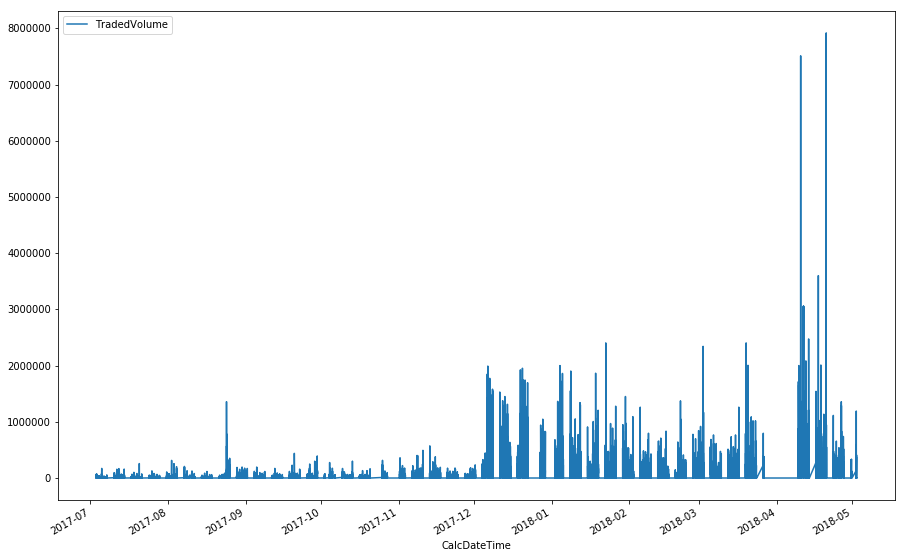

In [20]:
def basic_stock_features(input_df, mnemonic, new_time_index):
    stock = sorted_by_index.loc[mnemonic].copy()

    stock['HasTrade'] = 1.0
    
    stock = stock.reindex(new_time_index)
    
    features = ['MinPrice', 'MaxPrice', 'EndPrice', 'StartPrice']
    for f in features:
        stock[f] = stock[f].fillna(method='ffill')   
    
    features = ['HasTrade', 'TradedVolume', 'NumberOfTrades']
    for f in features:
        stock[f] = stock[f].fillna(0.0)
    
    stock['Mnemonic'] = mnemonic
    selected_features = ['Mnemonic', 'MinPrice', 'MaxPrice', 'StartPrice', 'EndPrice', 'HasTrade', 'TradedVolume', 'NumberOfTrades']
    return stock[selected_features]


snh = basic_stock_features(sorted_by_index, 'SNH', new_datetime_index)
snh[['TradedVolume']].plot()

In [21]:
snh.head()

,Mnemonic,MinPrice,MaxPrice,StartPrice,EndPrice,HasTrade,TradedVolume,NumberOfTrades
CalcDateTime,,,,,,,,
2017-07-03 08:00:00,SNH,4.450,4.456,4.456,4.450,1.0,5505.0,9.0
2017-07-03 08:01:00,SNH,4.450,4.456,4.456,4.450,0.0,0.0,0.0
2017-07-03 08:02:00,SNH,4.450,4.456,4.456,4.450,0.0,0.0,0.0
2017-07-03 08:03:00,SNH,4.457,4.457,4.457,4.457,1.0,899.0,2.0
2017-07-03 08:04:00,SNH,4.457,4.457,4.457,4.457,0.0,0.0,0.0


In [22]:
if enable_assert:
    tmp = basic_stock_features(sorted_by_index, 'BMW', new_datetime_index)
    tmp = tmp[tmp.index == np.datetime64('2018-01-02T09:01:00.000000000')]
    assert (tmp['EndPrice'].values[0] == 84.47)
    assert (tmp['TradedVolume'].values[0] == 4143)

In [23]:
stocks = []
for stock in top_k_stocks:
    stock = basic_stock_features(sorted_by_index, stock, new_datetime_index)
    stocks.append(stock)
# prepared should contain the numeric features for all top k stocks,
# for all days in the interval, for which there were trades (that means excluding weekends and holidays)
# for all minutes from 08:00 until 20:00
# in minutes without trades the prices from the last available minute are carried forward
# trades are filled with zero for such minutes
# a new column called HasTrade is introduced to denote the presence of trades
prepared = pd.concat(stocks, axis=0)

In [24]:
prepared['Mnemonic'].unique(), prepared['Mnemonic'].unique().shape[0]

(array(['SNH', 'DBK', 'EOAN', 'DTE', 'CBK', 'RWE', 'IFX', 'SVAB', 'LHA',
        'DAI', 'O2D', 'TKA', 'DPW', 'HDD', 'SIE', 'AIXA', 'BAYN', 'SAP',
        'BAS', 'EVT', 'AT1', 'PSM', 'BMW', 'VOW3', 'FRE', 'GAZ', 'SDF',
        'CEC', 'ALV', 'VNA', 'B4B', 'SHA', 'AB1', 'UN01', 'DLG', 'NOA3',
        'NDX1', 'IGY', 'VODI', 'ADS', '1COV', 'TUI1', 'BPE5', 'HEI', 'KCO',
        'ADV', 'SZU', 'EVK', 'HEN3', 'WDI', 'MUV2', 'DWNI', 'MRK', 'USE',
        'PAH3', 'DEZ', 'FME', 'G1A', 'FNTN', 'RKET', 'QIA', 'DB1', 'ZAL',
        'QSC', 'CON', 'SGL', 'BVB', 'TINA', 'PBB', 'PNE3', 'RIB', 'OSR',
        'SHL', 'BEI', 'AOX', 'TEG', 'UTDI', 'ARL', 'MDG1', 'KGX', 'LXS',
        'ARO', 'SANT', 'TTI', 'GYC', 'ANO', 'LINU', 'SOW', 'SZG', 'BOSS',
        'LLD', 'BNR', 'WAF', 'LIN', 'DRI', 'NDA', 'ZIL2', 'SY1', 'CAP',
        '3W9K'], dtype=object), 100)

In [25]:
prepared.head()

,Mnemonic,MinPrice,MaxPrice,StartPrice,EndPrice,HasTrade,TradedVolume,NumberOfTrades
CalcDateTime,,,,,,,,
2017-07-03 08:00:00,SNH,4.450,4.456,4.456,4.450,1.0,5505.0,9.0
2017-07-03 08:01:00,SNH,4.450,4.456,4.456,4.450,0.0,0.0,0.0
2017-07-03 08:02:00,SNH,4.450,4.456,4.456,4.450,0.0,0.0,0.0
2017-07-03 08:03:00,SNH,4.457,4.457,4.457,4.457,1.0,899.0,2.0
2017-07-03 08:04:00,SNH,4.457,4.457,4.457,4.457,0.0,0.0,0.0


In [26]:
if enable_assert:
    tmp = prepared[prepared.Mnemonic == 'BMW']
    tmp = tmp[tmp.index == np.datetime64('2018-01-02T09:01:00.000000000')]
    assert (tmp['EndPrice'].values[0] == 84.47)
    assert (tmp['TradedVolume'].values[0] == 4143)

In [27]:
# We save both in csv in pickle. Generally we'd read from the pickeled format because 
# it preserves the indices, but for cases where pkl cannot be read, we also output a csv format
! mkdir -p {output_folder}
prepared.to_csv(output_folder + '/cooked_v3.csv')

prepared.to_pickle(output_folder + '/cooked_v3.pkl')

## Future Work

- Prepare data by 5 min, 15 min, 30 min, 1 hour, 1 day
- Add extra (derived) features